In [1]:
!pip install pandas

In [3]:
import pandas as pd

In [5]:
mvps = pd.read_csv("mvps.csv")

In [6]:
# Adjusting mvps table to only include necessary columns
# Some of the other columns exist in the other tables

mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [7]:
players = pd.read_csv("players.csv")

In [8]:
# Removing unwanted columns
del players["Unnamed: 0"]
del players["Rk"]

In [9]:
# Merging players and mvps based on the player name and year

In [10]:
# Removing trailing asterisk from players who have it in their name
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [14]:
# A few players have multiple entries for the same year
# This is because they may have played for multiple teams within a season
# Grouping them together

# If the player has one entry return otherwise only return the entry with the player's total stats
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Team"] == "TOT"]
        # Replace the team TOT with the last team they played for
        row["Team"] = df.iloc[-1,:]["Team"]
        return row
    
players = players.groupby(["Player", "Year"]).apply(single_row)

In [ ]:
# Removing extra index levels that were created from the previous cell
players.index = players.index.droplevel()
players.index = players.index.droplevel()
# players.head(20)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards,Year
10800,Ömer Aşık,26,HOU,C,82,82,30.0,4.0,7.5,.541,...,8.3,11.7,0.9,0.6,1.1,2.1,2.7,10.1,NaN,2013
11553,Ömer Aşık,27,HOU,C,48,19,20.2,2.1,4.0,.532,...,5.8,7.9,0.5,0.3,0.8,1.2,1.9,5.8,NaN,2014
12156,Ömer Aşık,28,NOP,C,76,76,26.1,2.8,5.4,.517,...,6.6,9.8,0.9,0.4,0.7,1.3,1.9,7.3,NaN,2015
12964,Ömer Aşık,29,NOP,C,68,64,17.3,1.5,2.9,.533,...,4.3,6.1,0.4,0.3,0.3,0.9,1.8,4.0,NaN,2016
13658,Ömer Aşık,30,NOP,C,31,19,15.5,1.0,2.1,.477,...,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,NaN,2017
6745,Šarūnas Jasikevičius,29,IND,PG,75,15,20.8,2.3,5.7,.396,...,1.8,2.0,3.0,0.5,0.1,1.5,1.4,7.3,NaN,2006
669,Šarūnas Marčiulionis,30,SEA,SG,66,4,18.1,3.3,6.9,.473,...,0.8,1.0,1.7,1.1,0.0,1.5,1.9,9.3,NaN,1995
1130,Šarūnas Marčiulionis,31,SAC,SG,53,0,19.6,3.3,7.3,.452,...,1.1,1.5,2.2,1.0,0.1,1.8,2.1,10.8,NaN,1996
1768,Šarūnas Marčiulionis,32,DEN,SG,17,0,15.0,2.2,5.9,.376,...,1.1,1.8,1.5,0.7,0.1,2.4,2.2,6.8,NaN,1997
916,Žan Tabak,24,HOU,C,37,0,4.9,0.6,1.4,.453,...,0.9,1.5,0.1,0.1,0.2,0.5,1.0,2.0,NaN,1995


In [82]:
# Merging the dataframes
combined = players.merge(mvps, how="outer", on=["Player", "Year"])
combined

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Awards,Year,Pts Won,Pts Max,Share
0,A.C. Green,30,PHO,PF,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,NaN,1994,NaN,NaN,NaN
1,A.C. Green,31,PHO,SF,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,NaN,1995,NaN,NaN,NaN
2,A.C. Green,32,PHO,SF,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,NaN,1996,NaN,NaN,NaN
3,A.C. Green,34,DAL,PF,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,NaN,1998,NaN,NaN,NaN
4,A.C. Green,35,DAL,PF,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,NaN,1999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,James Harden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,1.0,1010.0,0.001
12457,Nikola JokiÄ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022,875.0,1000.0,0.875
12458,Luka DonÄiÄ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022,146.0,1000.0,0.146
12459,Nikola JokiÄ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023,674.0,1000.0,0.674


In [83]:
# Replacing NAN values with 0
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

# Cleaning issues that came from merge
combined = combined.iloc[:12439]
combined = combined[combined['Player'] != 'League Average']

In [84]:
# Combining with team data

In [85]:
teams = pd.read_csv("teams.csv")

In [86]:
# Removing any rows that had division in it
teams = teams[~teams["W"].str.contains("Division")].copy()

In [87]:
# Removing asterisks from team names
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,98.5,91.5,6.48,1994,New York Knicks
1,1,50,32,.610,7.0,105.7,101.8,3.68,1994,Orlando Magic
2,2,45,37,.549,12.0,103.2,101.0,2.11,1994,New Jersey Nets
3,3,42,40,.512,15.0,103.4,100.7,2.40,1994,Miami Heat
4,4,32,50,.390,25.0,100.8,105.1,-4.28,1994,Boston Celtics


In [88]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]: # Skipping header row
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name


In [ ]:
combined["Tm"] = combined["Team"]
del combined["Team"]
combined["Team"] = combined["Tm"].map(nicknames)
combined

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,...,TOV,PF,PTS,Awards,Year,Pts Won,Pts Max,Share,Tm,Team
0,A.C. Green,30,PF,82,55,34.5,5.7,11.3,.502,0.1,...,1.2,1.7,14.7,NaN,1994,0.0,0.0,0.0,PHO,Phoenix Suns
1,A.C. Green,31,SF,82,52,32.8,3.8,7.5,.504,0.5,...,1.4,1.8,11.2,NaN,1995,0.0,0.0,0.0,PHO,Phoenix Suns
2,A.C. Green,32,SF,82,36,25.8,2.6,5.4,.484,0.2,...,1.0,1.7,7.5,NaN,1996,0.0,0.0,0.0,PHO,Phoenix Suns
3,A.C. Green,34,PF,82,68,32.3,3.0,6.5,.453,0.0,...,0.8,1.9,7.3,NaN,1998,0.0,0.0,0.0,DAL,Dallas Mavericks
4,A.C. Green,35,PF,50,35,18.5,2.2,5.1,.422,0.0,...,0.4,1.4,4.9,NaN,1999,0.0,0.0,0.0,DAL,Dallas Mavericks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12434,Žarko Čabarkapa,24,PF,61,0,8.3,1.1,2.9,.385,0.1,...,0.6,1.4,3.3,NaN,2006,0.0,0.0,0.0,GSW,Golden State Warriors
12435,Željko Rebrača,29,C,74,4,15.9,2.6,5.1,.505,0.0,...,1.1,2.6,6.9,NaN,2002,0.0,0.0,0.0,DET,Detroit Pistons
12436,Željko Rebrača,30,C,30,12,16.3,2.7,4.8,.552,0.0,...,1.0,2.6,6.6,NaN,2003,0.0,0.0,0.0,DET,Detroit Pistons
12437,Željko Rebrača,32,C,58,2,16.0,2.3,4.0,.568,0.0,...,0.8,2.2,5.8,NaN,2005,0.0,0.0,0.0,LAC,Los Angeles Clippers


In [93]:
stats = combined.merge(teams, how='outer', on=["Team", "Year"])
del stats["Unnamed: 0"]
# stats

In [108]:
# Converting data types of columns
stats["GB"] = stats["GB"].apply(lambda x: "0" if x == "—" else x)
stats = stats.apply(pd.to_numeric, errors="ignore")
# stats.dtypes

In [109]:
stats.to_csv("player_stats.csv")

In [ ]:
# Visualizations

In [ ]:
# Highest scoring player in total dataset
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring

,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,...,Share,Tm,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
11022,James Harden,29,PG,78,78,36.8,10.8,24.5,0.442,4.8,...,0.768,HOU,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
806,Kobe Bryant,27,SG,80,80,41.0,12.2,27.2,0.450,2.3,...,0.386,LAL,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
3646,Allen Iverson,30,PG,72,72,43.1,11.3,25.3,0.447,1.0,...,0.001,PHI,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
5720,Tracy McGrady,23,SG,75,74,39.4,11.1,24.2,0.457,2.3,...,0.359,ORL,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
5259,Kevin Durant,25,SF,81,81,38.5,10.5,20.8,0.503,2.4,...,0.986,OKC,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
5303,Russell Westbrook,28,PG,81,81,34.6,10.2,24.0,0.425,2.5,...,0.879,OKC,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
820,Kobe Bryant,28,SG,77,77,40.8,10.6,22.8,0.463,1.8,...,0.404,LAL,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
2669,LeBron James,21,SF,79,79,42.5,11.1,23.1,0.480,1.6,...,0.550,CLE,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17
736,Allen Iverson,25,SG,71,71,42.0,10.7,25.5,0.420,1.4,...,0.904,PHI,Philadelphia 76ers,56,26,0.683,0.0,94.7,90.4,3.64
790,Allen Iverson,29,PG,75,75,42.3,10.3,24.2,0.424,1.4,...,0.189,PHI,Philadelphia 76ers,43,39,0.524,2.0,99.1,99.9,-1.07


<Axes: xlabel='Player'>

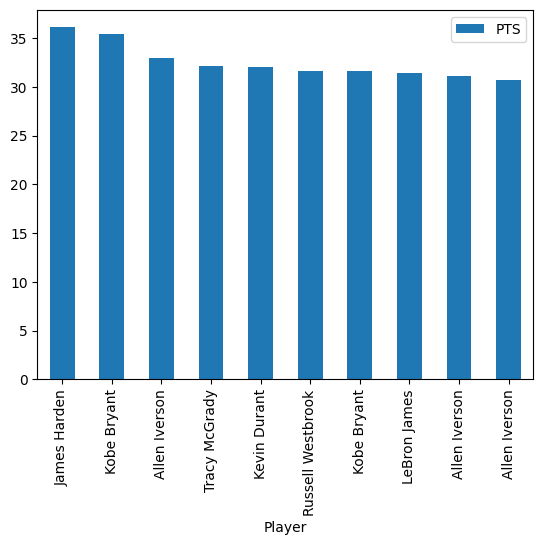

In [111]:
highest_scoring.plot.bar("Player", "PTS")

In [115]:
# Highest scorer per year
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scoring

,,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,3P,...,Share,Tm,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1994,7196,David Robinson,28,C,80,80,40.5,10.5,20.7,0.507,0.1,...,0.723,SAS,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,6101,Shaquille O'Neal,22,C,79,79,37.0,11.8,20.2,0.583,0.0,...,0.576,ORL,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,8750,Michael Jordan,32,SG,82,82,37.7,11.2,22.6,0.495,1.4,...,0.986,CHI,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,8764,Michael Jordan,33,SG,82,82,37.9,11.2,23.1,0.486,1.4,...,0.832,CHI,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,8777,Michael Jordan,34,SG,82,82,38.8,10.7,23.1,0.465,0.4,...,0.934,CHI,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,710,Allen Iverson,23,SG,48,48,41.5,9.1,22.0,0.412,1.2,...,0.270,PHI,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56
2000,83,Shaquille O'Neal,27,C,79,79,40.0,12.1,21.1,0.574,0.0,...,0.998,LAL,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41
2001,736,Allen Iverson,25,SG,71,71,42.0,10.7,25.5,0.420,1.4,...,0.904,PHI,Philadelphia 76ers,56,26,0.683,0.0,94.7,90.4,3.64
2002,747,Allen Iverson,26,SG,60,59,43.7,11.1,27.8,0.398,1.3,...,0.023,PHI,Philadelphia 76ers,43,39,0.524,9.0,91.0,89.4,1.27


<Axes: xlabel='Year'>

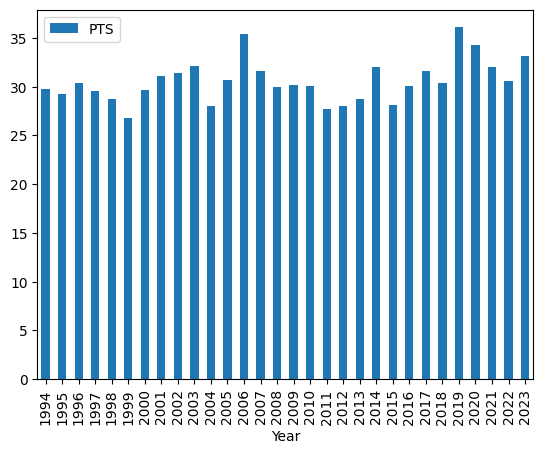

In [116]:
highest_scoring.plot.bar("Year", "PTS")

In [118]:
# Checking which stats correlate the most to the Share column
numeric_stats = stats.select_dtypes(include=["number"])
numeric_stats.corr()["Share"]

Age        0.021675
G          0.089434
GS         0.166443
MP         0.161379
FG         0.274891
FGA        0.248769
FG%        0.060716
3P         0.092014
3PA        0.092092
3P%        0.012458
2P         0.278770
2PA        0.256829
2P%        0.053927
eFG%       0.052085
FT         0.325395
FTA        0.332849
FT%        0.034898
ORB        0.097333
DRB        0.214175
TRB        0.186579
AST        0.200452
STL        0.167786
BLK        0.154404
TOV        0.237426
PF         0.071962
PTS        0.287602
Year      -0.012932
Pts Won    0.996019
Pts Max    0.527506
Share      1.000000
W          0.123460
L         -0.122499
W/L%       0.127462
GB        -0.099199
PS/G       0.033787
PA/G      -0.043011
SRS        0.121743
Name: Share, dtype: float64